## Lab 5

### Imports

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import scipy as sp

### Strategy
1. Read data
2. Plot data
3. Look at F-statistic, p-value
4. R**2
5. Estimated coefficients and their p-values

## Toluca Dataset

### Read data

In [10]:
df = pd.read_csv('toluca.csv')
df.head()

,lotSize,workHours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361


### Plot Data

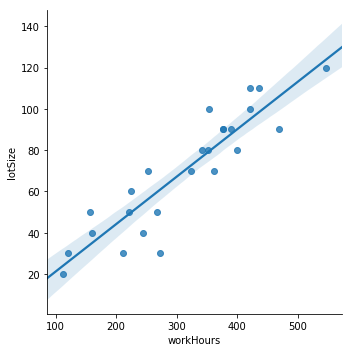

In [27]:
sns.lmplot(x='workHours', y='lotSize', data=df)

### F-Statistic and P-values

In [16]:
# Want high F value and low P value (F value degree in which X and Y are moving together)
tolucaOLSmodel = smf.ols('workHours ~ lotSize', df).fit()
print(f'Fvalue: {tolucaOLSmodel.fvalue}\nPvalue: {tolucaOLSmodel.f_pvalue}')

Fvalue: 105.87570891593043
Pvalue: 4.4488275871889437e-10


In [19]:
# R ** 2
tolucaOLSmodel.rsquared

0.8215334744346305

In [18]:
# Slope and Intercept
tolucaOLSmodel.params

Intercept    62.365859
lotSize       3.570202
dtype: float64

In [20]:
# How confident we are with the tolerance between the guess and the actual
tolucaOLSmodel.pvalues

Intercept    2.585094e-02
lotSize      4.448828e-10
dtype: float64

In [23]:
sample_1 = tolucaOLSmodel.resid[1:round(len(tolucaOLSmodel.resid)/2)]
sample_2 = tolucaOLSmodel.resid[round(len(tolucaOLSmodel.resid)/2) + 1:]
sp.stats.levene(sample_1, sample_2, center='median')

LeveneResult(statistic=0.045672820144710385, pvalue=0.8328329469420114)

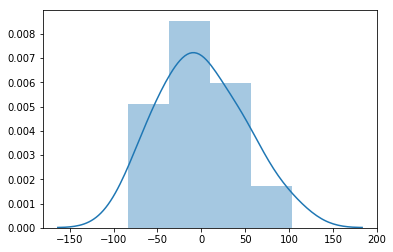

In [24]:
sns.distplot(tolucaOLSmodel.resid)

In [25]:
sp.stats.shapiro(tolucaOLSmodel.resid)[1]

0.8625532984733582

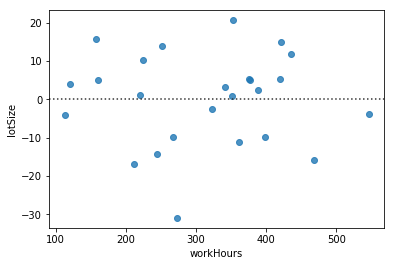

In [30]:
sns.residplot(x='workHours', y='lotSize', data=df)

## Credit Dataset

In [26]:
df2 = pd.read_csv('Credit.csv', index_col=0)
df2.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [58]:
def plot_and_info(x, y, data):
    sns.lmplot(x=x, y=y, data=data)
    model = smf.ols(f'{x} ~ {y}', data).fit()
    print(f'Fvalue: {model.fvalue}')
    print(f'Pvalue: {model.f_pvalue}')
    print(f'Rsquared: {model.rsquared}')
    print('--------------------------')
    print(f'incomeOLSmodel.params\n{model.params}')
    print('--------------------------')
    print(f'incomeOLSmodel.pvalues\n{model.pvalues}')
    return model

def dist_plot(model):
    sample_1 = model.resid[1:round(len(model.resid)/2)]
    sample_2 = model.resid[round(len(model.resid)/2) + 1:]
    sp.stats.levene(sample_1, sample_2, center='median')
    sns.distplot(model.resid)
    print('--------------------------')
    print('sp.stats.shapiro(tolucaOLSmodel.resid)[1]')
    print(sp.stats.shapiro(tolucaOLSmodel.resid)[1])

### Income

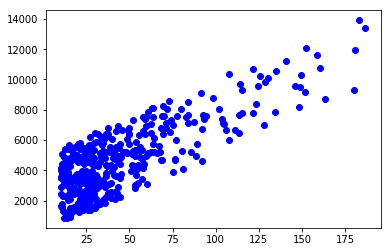

In [32]:
plt.scatter(df2.iloc[:,0], df2.iloc[:,1], color='blue')

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'Income')]

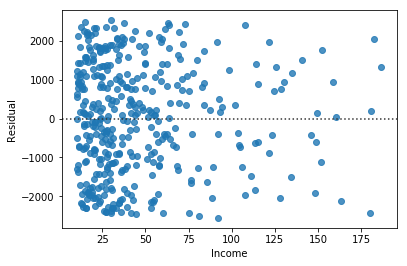

In [31]:
sns.residplot('Income', 'Limit', data=df2).set(xlabel='Income', ylabel='Residual')

Fvalue: 670.180915586611
Pvalue: 2.391789442285369e-87
Rsquared: 0.627403940481907
--------------------------
incomeOLSmodel.params
Intercept   -12.055966
Limit         0.012095
dtype: float64
--------------------------
incomeOLSmodel.pvalues
Intercept    1.400464e-06
Limit        2.391789e-87
dtype: float64


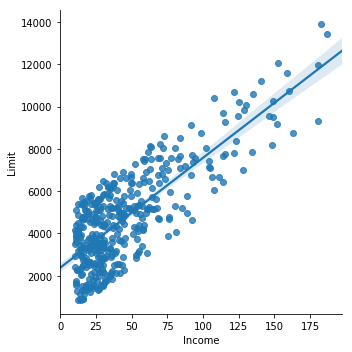

In [59]:
model = plot_and_info('Income', 'Limit', df2)

--------------------------
sp.stats.shapiro(tolucaOLSmodel.resid)[1]
0.8625532984733582


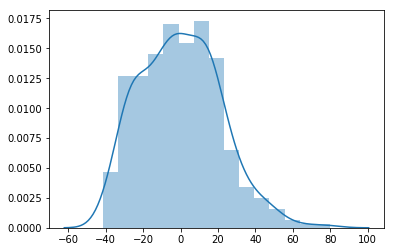

In [60]:
dist_plot(model)

### Rating

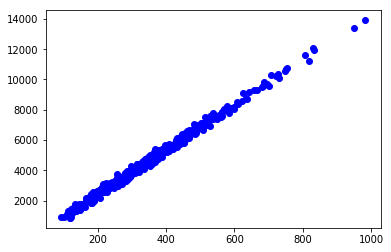

In [33]:
plt.scatter(df2.iloc[:,2], df2.iloc[:,1], color='blue')

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'Rating')]

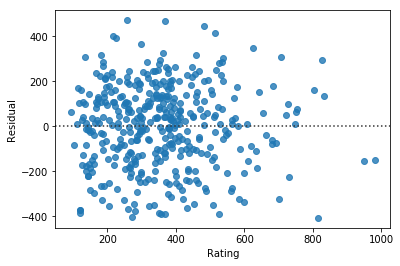

In [34]:
sns.residplot('Rating', 'Limit', data=df2).set(xlabel='Rating', ylabel='Residual')

Fvalue: 63478.33074542942
Pvalue: 0.0
Rsquared: 0.9937692100445441
--------------------------
incomeOLSmodel.params
Intercept    38.491789
Limit         0.066823
dtype: float64
--------------------------
incomeOLSmodel.pvalues
Intercept    2.793671e-94
Limit        0.000000e+00
dtype: float64


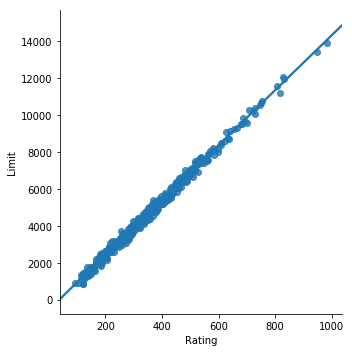

In [61]:
model = plot_and_info('Rating', 'Limit', df2)

--------------------------
sp.stats.shapiro(tolucaOLSmodel.resid)[1]
0.8625532984733582


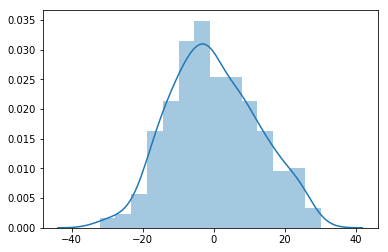

In [62]:
dist_plot(model)

### Cards

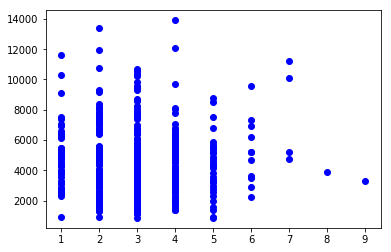

In [35]:
plt.scatter(df2.iloc[:,3], df2.iloc[:,1], color='blue')

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'Cards')]

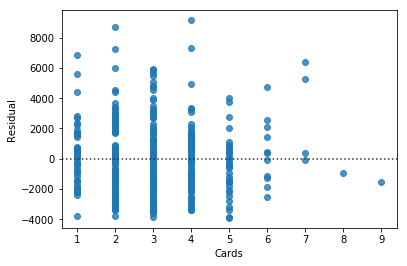

In [36]:
sns.residplot('Cards', 'Limit', data=df2).set(xlabel='Cards', ylabel='Residual')

Fvalue: 0.04166707131304197
Pvalue: 0.8383600476932938
Rsquared: 0.00010468017486620074
--------------------------
incomeOLSmodel.params
Intercept    2.928716
Limit        0.000006
dtype: float64
--------------------------
incomeOLSmodel.pvalues
Intercept    2.426533e-56
Limit        8.383600e-01
dtype: float64


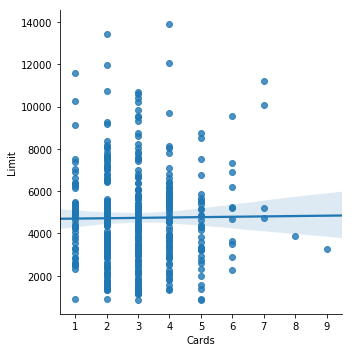

In [63]:
model = plot_and_info('Cards', 'Limit', df2)

--------------------------
sp.stats.shapiro(tolucaOLSmodel.resid)[1]
0.8625532984733582


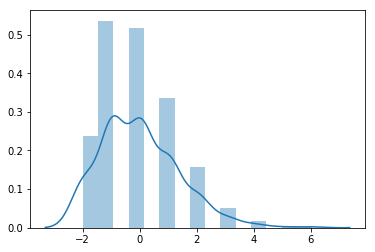

In [64]:
dist_plot(model)

### Age

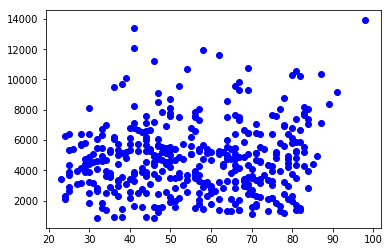

In [37]:
plt.scatter(df2.iloc[:,4], df2.iloc[:,1], color='blue')

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'Age')]

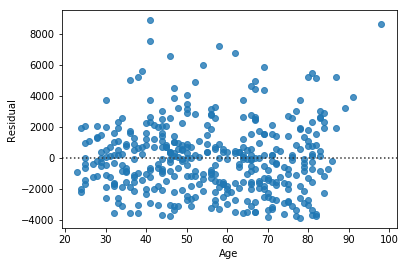

In [38]:
sns.residplot('Age', 'Limit', data=df2).set(xlabel='Age', ylabel='Residual')

Fvalue: 4.092648846827622
Pvalue: 0.04373814516304435
Rsquared: 0.010178372717245754
--------------------------
incomeOLSmodel.params
Intercept    52.097032
Limit         0.000754
dtype: float64
--------------------------
incomeOLSmodel.pvalues
Intercept    4.464771e-90
Limit        4.373815e-02
dtype: float64


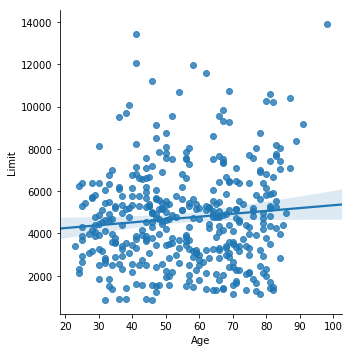

In [66]:
model = plot_and_info('Age', 'Limit', df2)

--------------------------
sp.stats.shapiro(tolucaOLSmodel.resid)[1]
0.8625532984733582


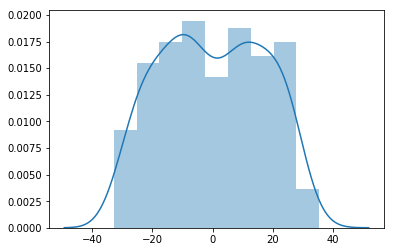

In [67]:
dist_plot(model)

### Education

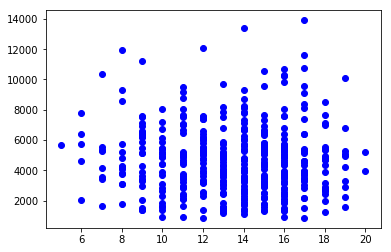

In [39]:
plt.scatter(df2.iloc[:,5], df2.iloc[:,1], color='blue')

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'Education')]

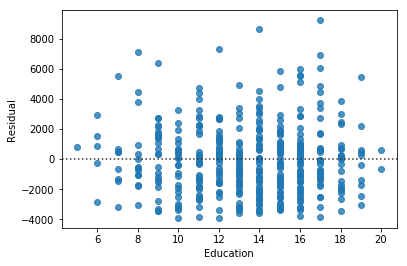

In [40]:
sns.residplot('Education', 'Limit', data=df2).set(xlabel='Education', ylabel='Residual')

Fvalue: 0.220826773734422
Pvalue: 0.6386680504768163
Rsquared: 0.0005545334620579156
--------------------------
incomeOLSmodel.params
Intercept    13.600989
Limit        -0.000032
dtype: float64
--------------------------
incomeOLSmodel.pvalues
Intercept    1.056212e-134
Limit         6.386681e-01
dtype: float64


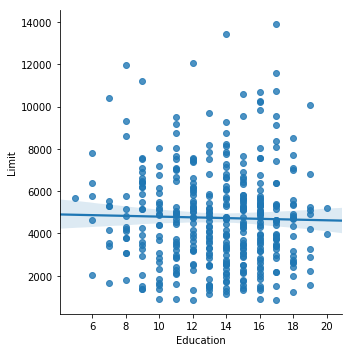

In [68]:
model = plot_and_info('Education', 'Limit', df2)

--------------------------
sp.stats.shapiro(tolucaOLSmodel.resid)[1]
0.8625532984733582


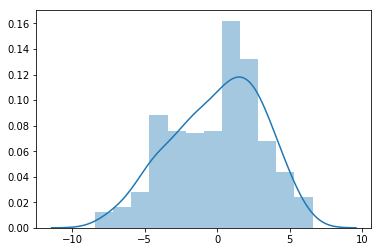

In [69]:
dist_plot(model)